# Linear Regression


In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
print('setup completed')

setup completed


## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [29]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

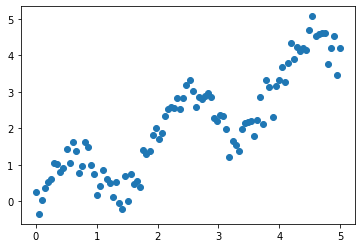

In [30]:
plt.scatter(x,y)

#### nonlinear

In [31]:
regr_lin = LinearRegression()

In [32]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [33]:
regr_lin.fit(X,y)

LinearRegression()

0.47456134355371277


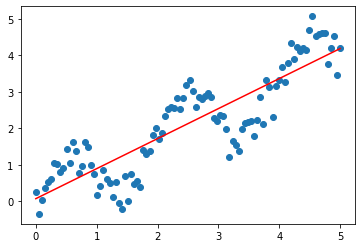

In [34]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [35]:
print(x.shape)

(100,)


In [56]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [37]:
regr_poly = LinearRegression()

In [38]:
regr_poly.fit(X_poly, y)

LinearRegression()

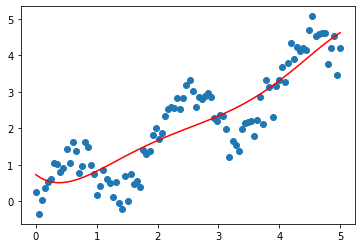

In [39]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [40]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.28674884  2.20716347 -1.01803961  0.20630513 -0.01489183]
interception:  0.7278575249031025


In [41]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.72785752, 0.66837034, 0.61937479, 0.58013156, 0.54993238,
       0.52809943, 0.51398475, 0.50696968, 0.50646424, 0.51190654,
       0.52276222, 0.53852387, 0.55871038, 0.58286644, 0.61056188,
       0.64139111, 0.67497256, 0.71094804, 0.74898219, 0.78876189,
       0.82999564, 0.87241304, 0.91576411, 0.9598188 , 1.00436633,
       1.04921463, 1.09418975, 1.1391353 , 1.18391181, 1.22839617,
       1.27248106, 1.31607434, 1.35909847, 1.4014899 , 1.44319853,
       1.48418709, 1.52443055, 1.56391556, 1.60263984, 1.64061157,
       1.67784887, 1.71437916, 1.75023858, 1.7854714 , 1.82012947,
       1.85427158, 1.88796291, 1.92127442, 1.95428229, 1.9870673 ,
       2.01971426, 2.05231143, 2.08494991, 2.11772309, 2.150726  ,
       2.18405482, 2.21780617, 2.25207664, 2.28696213, 2.32255728,
       2.35895489, 2.39624533, 2.43451595, 2.4738505 , 2.51432854,
       2.55602482, 2.59900877, 2.64334383, 2.68908692, 2.73628781,
       2.78498857, 2.83522296, 2.88701586, 2.94038266, 2.99532

In [42]:
regr_poly.predict(X_poly)

array([0.72785752, 0.66837034, 0.61937479, 0.58013156, 0.54993238,
       0.52809943, 0.51398475, 0.50696968, 0.50646424, 0.51190654,
       0.52276222, 0.53852387, 0.55871038, 0.58286644, 0.61056188,
       0.64139111, 0.67497256, 0.71094804, 0.74898219, 0.78876189,
       0.82999564, 0.87241304, 0.91576411, 0.9598188 , 1.00436633,
       1.04921463, 1.09418975, 1.1391353 , 1.18391181, 1.22839617,
       1.27248106, 1.31607434, 1.35909847, 1.4014899 , 1.44319853,
       1.48418709, 1.52443055, 1.56391556, 1.60263984, 1.64061157,
       1.67784887, 1.71437916, 1.75023858, 1.7854714 , 1.82012947,
       1.85427158, 1.88796291, 1.92127442, 1.95428229, 1.9870673 ,
       2.01971426, 2.05231143, 2.08494991, 2.11772309, 2.150726  ,
       2.18405482, 2.21780617, 2.25207664, 2.28696213, 2.32255728,
       2.35895489, 2.39624533, 2.43451595, 2.4738505 , 2.51432854,
       2.55602482, 2.59900877, 2.64334383, 2.68908692, 2.73628781,
       2.78498857, 2.83522296, 2.88701586, 2.94038266, 2.99532

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [43]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [44]:
sigma = 0.3

In [45]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [46]:
regr_rbf = LinearRegression()

In [47]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

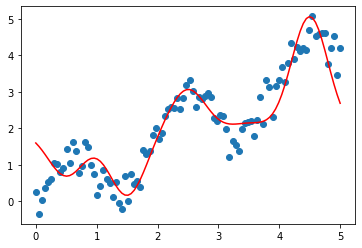

In [48]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [49]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.20393629 -1.73775465  1.17488012  0.2330255   3.16703716]
interception:  1.8963387858636747


#### Comparison

In [50]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

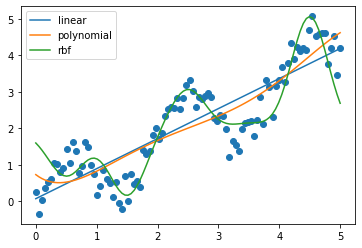

In [51]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [52]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.47456134355371277


In [53]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4364935412763284


In [54]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.28796122466075424
